# Setting up
Upload the book epub file to the root directory of the project and update the epub_path variable.

In [1]:
# Enter book name here
epub_path = "./book.epub"

# Install dependencies

In [ ]:
%pip install ebooklib
%pip install networkx
%pip install matplotlib
%pip install numpy
%pip install beautifulsoup4
%pip install html2text
%pip install spacy
%pip install textblob
%pip install wordcloud
%pip install tabulate
%pip install python-louvain
%pip install pandas
!python -m spacy download en_core_web_trf

# Import dependencies

In [3]:
import os
import json
import spacy
from utils.epub_functions import create_flattened_book_json, html_to_markdown
from utils.nlp_functions import extract_character_names_with_variations, character_counter, plot_character_wordcloud, bar_plot_character_counts, extract_character_interactions
from utils.network_functions import plot_character_network_with_layout, plot_ego_network, summarize_character_network

# Extract contents from Epub

In [4]:
working_folder = "data"
os.makedirs(working_folder, exist_ok=True)

output_json = os.path.join(working_folder, "book_content.json")
flattened_json_path = create_flattened_book_json(epub_path, output_json)
print(f"Created flattened book content JSON at: {flattened_json_path}")

Created flattened book content JSON at: data\book_content.json


# Verify the book content and the titles of the sections in the book file

In [5]:
# See the titles of the sections in the book file

with open(flattened_json_path, 'r', encoding='utf-8') as f:
    book_content = json.load(f)

for i, section in enumerate(book_content):
    print(f"Index {i}: {section['title']}")


Index 0: The Covenant of Water
Index 1: Also by Abraham Verghese
Index 2: Title Page
Index 3: Copyright
Index 4: Dedication
Index 5: Epigraph
Index 6: Map
Index 7: PART ONE - CHAPTER 1
Index 8: PART ONE - CHAPTER 2
Index 9: PART ONE - CHAPTER 3
Index 10: PART ONE - CHAPTER 4
Index 11: PART ONE - CHAPTER 5
Index 12: PART ONE - CHAPTER 6
Index 13: PART ONE - CHAPTER 7
Index 14: PART ONE - CHAPTER 8
Index 15: PART ONE - CHAPTER 9
Index 16: PART TWO - CHAPTER 10
Index 17: PART TWO - CHAPTER 11
Index 18: PART TWO - CHAPTER 12
Index 19: PART TWO - CHAPTER 13
Index 20: PART TWO - CHAPTER 14
Index 21: PART TWO - CHAPTER 15
Index 22: PART TWO - CHAPTER 16
Index 23: PART TWO - CHAPTER 17
Index 24: PART TWO - CHAPTER 18
Index 25: PART TWO - CHAPTER 19
Index 26: PART TWO - CHAPTER 20
Index 27: PART TWO - CHAPTER 21
Index 28: PART TWO - CHAPTER 22
Index 29: PART THREE - CHAPTER 23
Index 30: PART THREE - CHAPTER 24
Index 31: PART THREE - CHAPTER 25
Index 32: PART THREE - CHAPTER 26
Index 33: PART TH

## Extract character names with variations

In [6]:
start_chapter = 7
end_chapter = 90
character_names_loc = f"{working_folder}/character_names.json"

In [7]:
# IMPORTANT: If the character names json file already exists, it will be overwritten. Don't run this cell if the file already exists.

if os.path.exists(character_names_loc):
    response = input(f"File {character_names_loc} already exists. Overwrite? (y/n): ")
    if response.lower() == 'y':
        extract_character_names_with_variations(book_content, character_names_loc, start_chapter, end_chapter)
        print(f"Overwrote {character_names_loc}")
    else:
        print("Skipping extraction - using existing file")
else:
    extract_character_names_with_variations(book_content, character_names_loc, start_chapter, end_chapter)
    print(f"Created {character_names_loc}")

Skipping extraction - using existing file


# IMPORTANT: Verify the character names json file to ensure that the character names are correct.
After extracting character names, edit the character names json file to add variations for each character. This is important for correct social network creation.

# Start Analysis

In [7]:
full_book_text = ""
for chapter in book_content[start_chapter:end_chapter+1]:
    full_book_text += html_to_markdown(chapter["content"])



# Character Counter

In [8]:
character_counter_loc = f"{working_folder}/character_counter.json"

In [9]:
with open(character_names_loc, "r", encoding="utf-8") as f:
    character_names = json.load(f)

character_counter(full_book_text, character_names, character_counter_loc)

Top 5 characters by mention count:
Big Ammachi: 1350 mentions
Mariamma: 821 mentions
Digby Kilgour: 810 mentions
Philipose: 531 mentions
Elsie: 480 mentions
Character counter saved to data/character_counter.json


Wordcloud generated for 20 characters. Scale type: linear


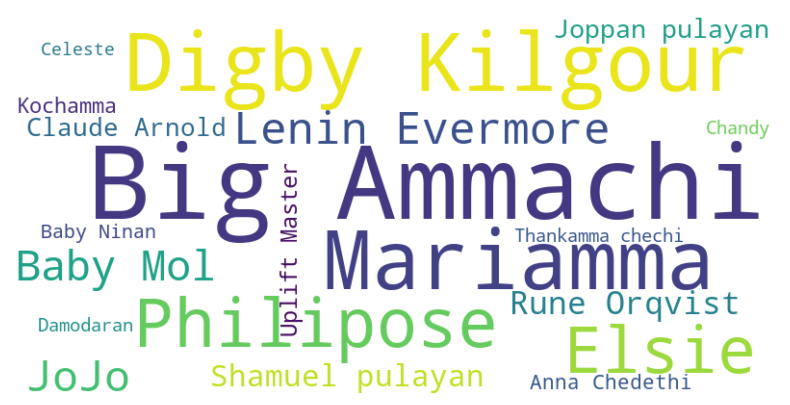

In [12]:
character_counter_data = json.load(open(character_counter_loc, "r", encoding="utf-8"))
plot_character_wordcloud(character_counter_data, scale_type='linear', top_n=20)


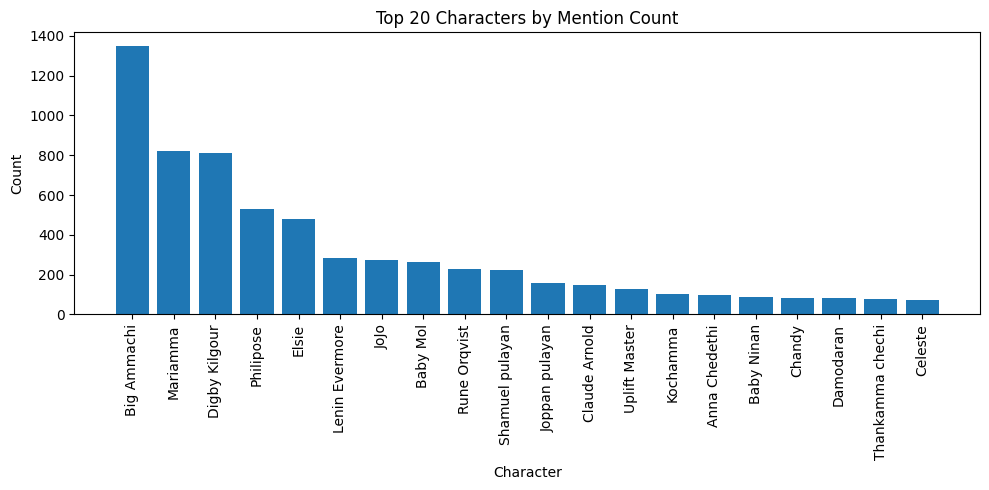

In [13]:
bar_plot_character_counts(character_counter_data)

# Generate Character Interactions

In [10]:
character_interactions_loc = f"{working_folder}/character_interactions.json"

In [11]:
extract_character_interactions(
    character_variations_path=character_names_loc,
    book_content=full_book_text,
    output_path=character_interactions_loc,
    granularity="line"  # or "para"
)

Loading character variations...
Preparing variation mapping...
Splitting text into lines...
Preparing regex pattern for character variations...
Analyzing character co-occurrences...
Preparing results...
Sorting and saving results...
Data saved to data/character_interactions.json in sorted order


# Network Analysis

In [16]:
min_cooccurrence = 3
min_character_degree = 2


Plotting character network:  kamada_kawai layout


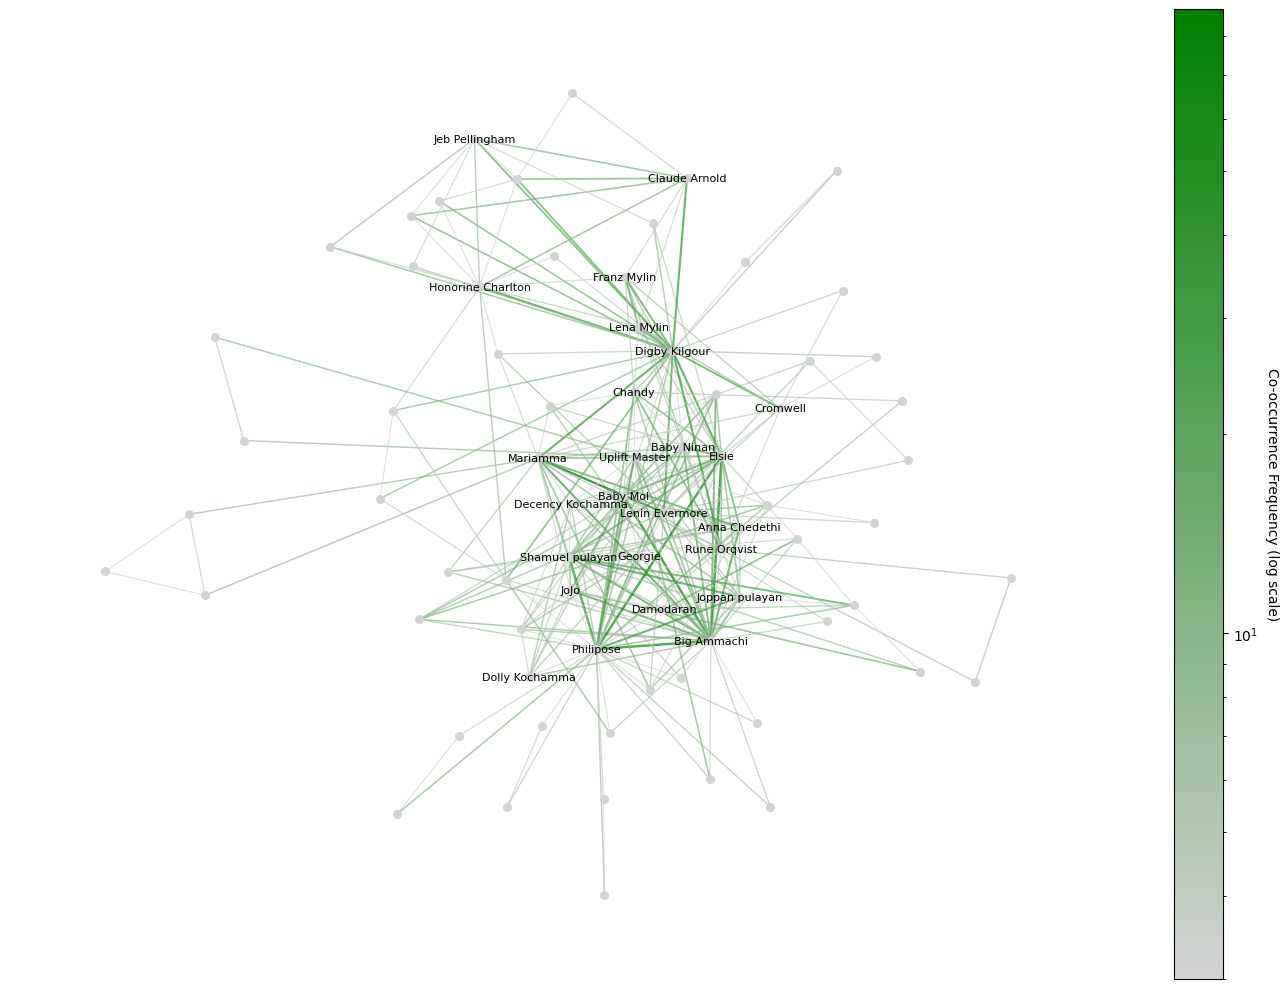

In [17]:
# read interactions data
interactions_data = json.load(open(character_interactions_loc, "r", encoding="utf-8"))
# plot character network
plot_character_network_with_layout(interactions_data, min_character_degree=min_character_degree, min_cooccurrence=min_cooccurrence, focus_top_n=False, top_n_labels=25)

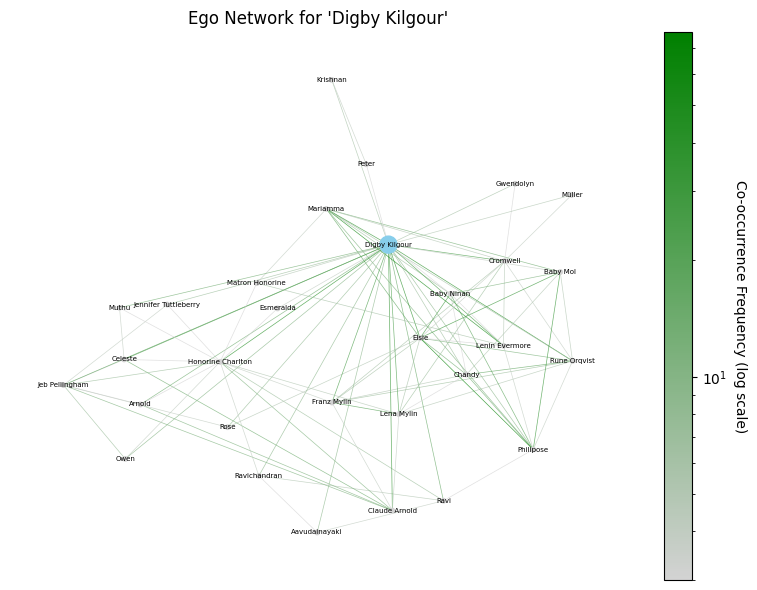

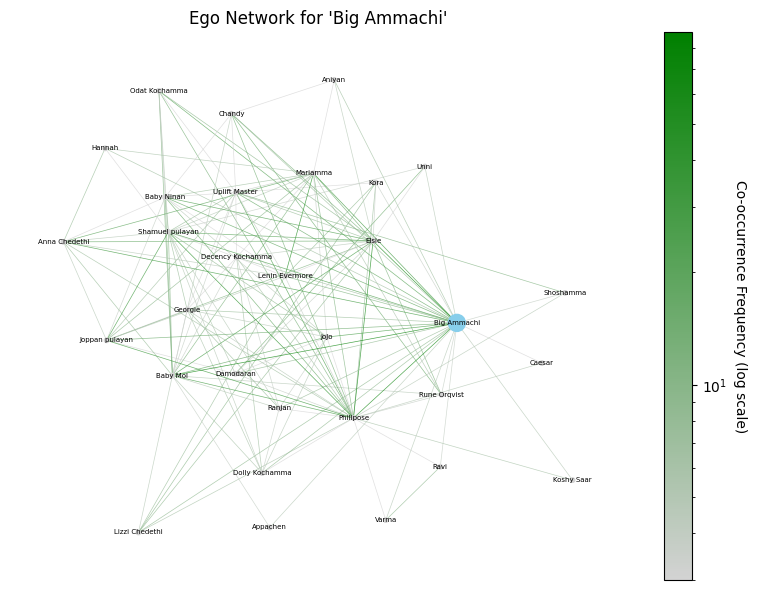

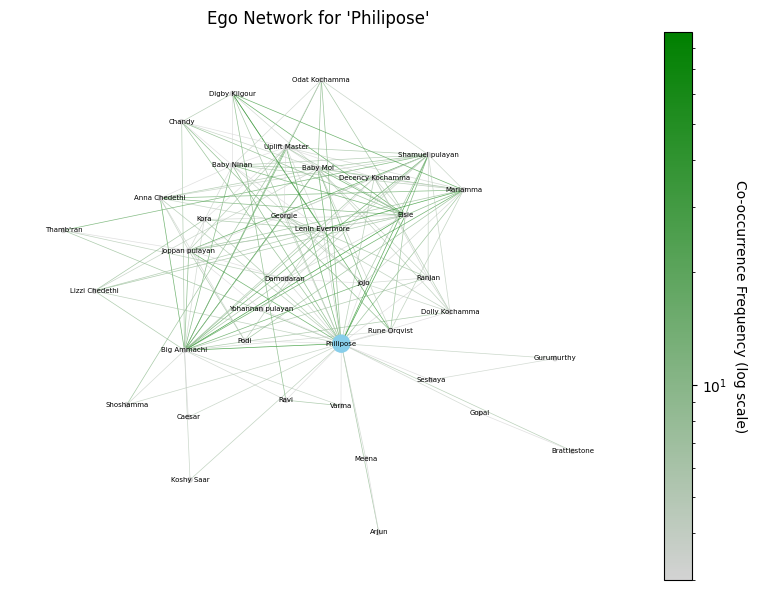

In [18]:
plot_ego_network(interactions_data, "Digby Kilgour", label_size=5, min_cooccurrence=min_cooccurrence, min_character_degree=min_character_degree)
plot_ego_network(interactions_data, "Big Ammachi", label_size=5, min_cooccurrence=min_cooccurrence, min_character_degree=min_character_degree)
plot_ego_network(interactions_data, "Philipose", label_size=5, min_cooccurrence=min_cooccurrence, min_character_degree=min_character_degree)

In [19]:
summarize_character_network(interactions_data, min_cooccurrence=min_cooccurrence, min_character_degree=min_character_degree)

=== Global Network Metrics ===
Metric                                 Value  Description
--------------------------------  ----------  -----------------------------------------------------------------------------------
Number of Nodes                    74         Total number of unique characters in the network.
Number of Edges                   271         Total number of unique character pairs with at least the minimum co-occurrence.
Density                             0.100333  Proportion of possible connections in the network that are actual connections.
Average Clustering Coefficient      0.779933  Average likelihood that a character's connections are also connected to each other.
Transitivity (Global Clustering)    0.39957   Overall probability that the adjacent nodes of a node are connected.
Connected Components                1         Number of disconnected sub-networks in the graph.
Largest Component Size             74         Number of characters in the largest connected s